In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_dataFrame = pd.read_csv(url)

# Display the first few rows of the dataset
titanic_dataFrame.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_dataFrame.shape[1]

12

In [4]:
# Check for missing values
titanic_dataFrame.isnull().sum()

# Fill missing 'Age' values with the median age
titanic_dataFrame['Age'].fillna(titanic_dataFrame['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode (most common value)
titanic_dataFrame['Embarked'].fillna(titanic_dataFrame['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to many missing values
titanic_dataFrame.drop(columns=['Cabin'], inplace=True)


In [5]:
# Convert 'Sex' and 'Embarked' to categorical data types
titanic_dataFrame['Sex'] = titanic_dataFrame['Sex'].astype('category')
titanic_dataFrame['Embarked'] = titanic_dataFrame['Embarked'].astype('category')

# Verify the changes
titanic_dataFrame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 64.8+ KB


In [6]:
# Check for duplicates
titanic_dataFrame.duplicated().sum()

# Remove duplicates if any
titanic_dataFrame.drop_duplicates(inplace=True)


In [7]:
# Summary statistics
titanic_dataFrame.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


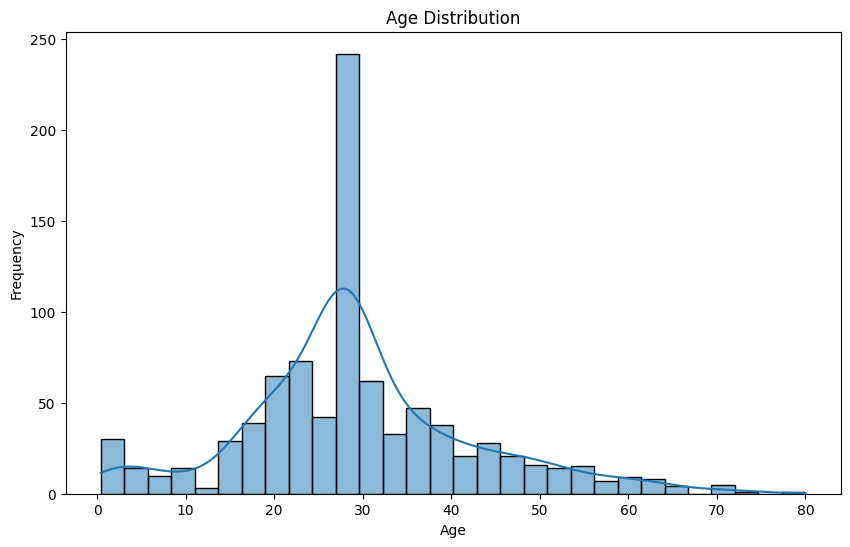

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_dataFrame['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-9-44dfcc398f38>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic_dataFrame, ci=None , edgecolor=".5", facecolor=(0, 0, 0, 0),)


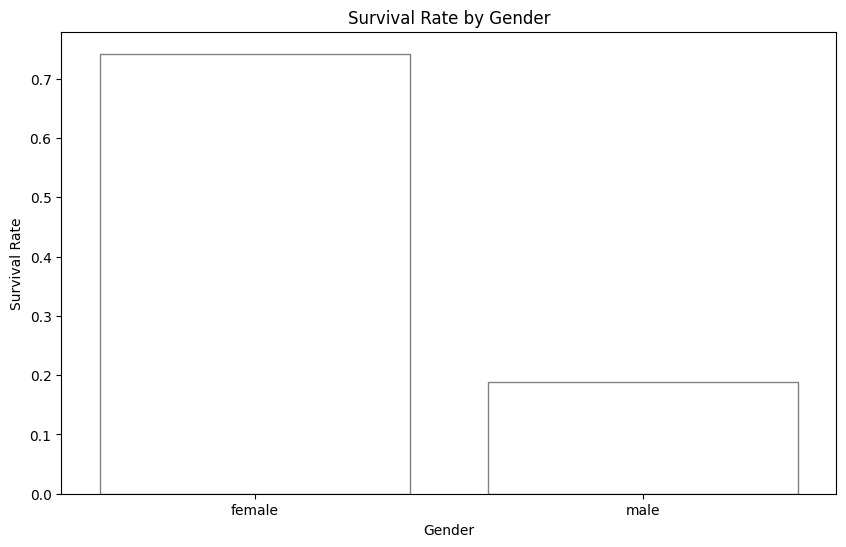

In [9]:
# Survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_dataFrame, ci=None , edgecolor=".5", facecolor=(0, 0, 0, 0),)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


## Survival rate by class

<ipython-input-10-06d1e2b6bd3f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_dataFrame, ci=None, edgecolor=".5", facecolor=(0, 0, 0, 0),)


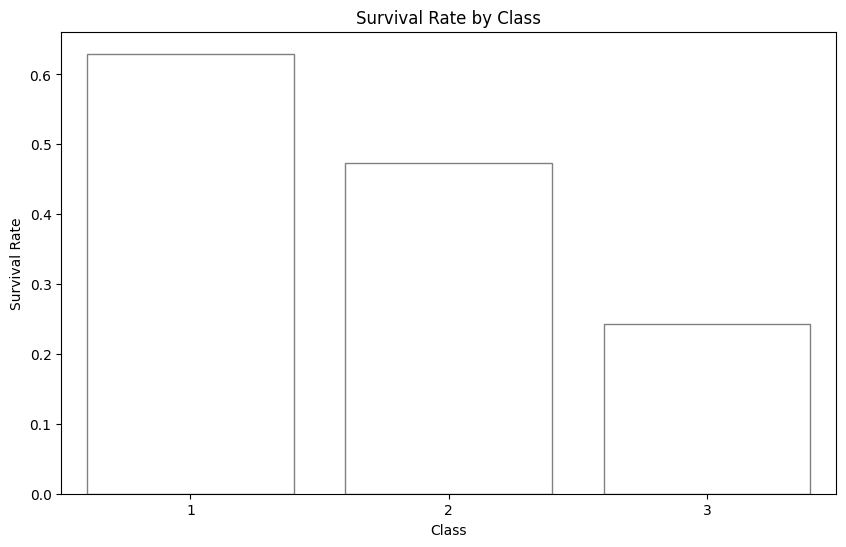

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_dataFrame, ci=None, edgecolor=".5", facecolor=(0, 0, 0, 0),)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()


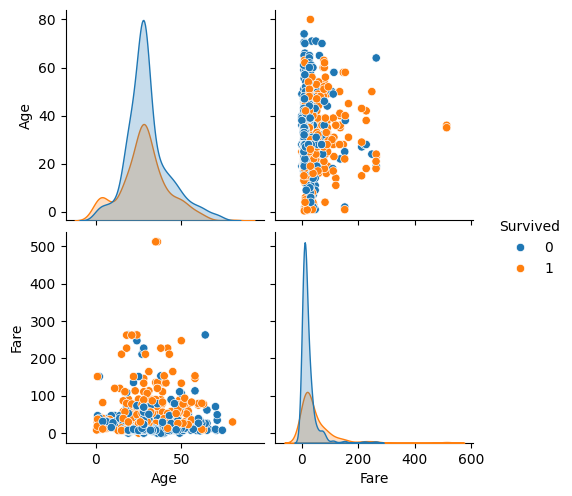

In [11]:

sns.pairplot(titanic_dataFrame[['Age', 'Fare', 'Survived']], hue='Survived', diag_kind='kde')
plt.show()


In [12]:
titanic_dataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
